## Co-register files with standard default mode networks

This is a matlab notebook!



In [7]:
gradfiles = dir(fullfile(pwd, 'data', 'Outputs', 'Gradient*.nii'));
indivfiles = dir(fullfile(pwd, 'res*.nii'));
disp(indivfiles)

10×1 struct array with fields:

    name
    folder
    date
    bytes
    isdir
    datenum


### Create a transformed file for each of these networks

Uses SPM (provided by Richard)

In [3]:
% First use the dorsal DMN
network_file = fullfile(pwd, 'standard-networks', 'dorsal_DMN', 'dDMN.nii');
for ifile = 1:numel(gradfiles)
    gradient_file = fullfile(pwd, 'data', 'Outputs', gradfiles(ifile).name);
    % Co-register file
    Transform_into_the_same_voxelspace(network_file, gradient_file);
end

Size of target image: 91  109   91
Size of object image: 63  75  61
Starting 3D interpolation of object image into target space...
Size of target image: 91  109   91
Size of object image: 63  75  61
Starting 3D interpolation of object image into target space...
Size of target image: 91  109   91
Size of object image: 63  75  61
Starting 3D interpolation of object image into target space...
Size of target image: 91  109   91
Size of object image: 63  75  61
Starting 3D interpolation of object image into target space...
Size of target image: 91  109   91
Size of object image: 63  75  61
Starting 3D interpolation of object image into target space...
Size of target image: 91  109   91
Size of object image: 63  75  61
Starting 3D interpolation of object image into target space...
Size of target image: 91  109   91
Size of object image: 63  75  61
Starting 3D interpolation of object image into target space...
Size of target image: 91  109   91
Size of object image: 63  75  61
Starting 3D int

### Cross-correlate the default mode with the gradients


In [2]:
network_file = fullfile(pwd, 'standard-networks', 'dorsal_DMN', 'dDMN.nii');
gradient_folder = fullfile(fileparts(network_file), 'gradients');
if exist(fullfile(pwd, 'mask.nii.gz'));
    mask_file = fullfile(pwd, 'mask.nii.gz');
else
    !bet ./standar-networks/dorsal_DMN/dDMN.nii ./mask.nii -m
    delete('mask.nii.gz');
    movefile('mask_mask.nii.gz', 'mask.nii.gz');
end

% use richard's crosscorrelate function
[r, p] = Between_components_correlations(network_file, gradient_folder, mask_file, 1);

mv: rename /Users/jan/Dropbox/Documents/Projects/gradients/mask_mask.nii.gz to /Users/jan/Dropbox/Documents/Projects/gradients/mask.nii.gz: No such file or directory


### Calculate a goodness of fit of these gradients


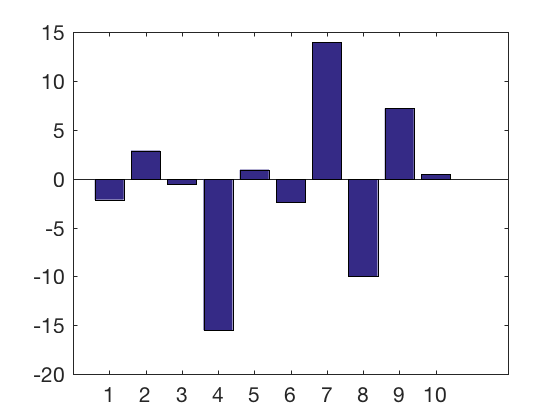

ans =

     2

  Columns 1 through 7

    0.0000   -0.1672   -0.0729   -0.0376    0.0304   -0.0259   -0.0732

  Columns 8 through 10

   -0.1147    0.1462   -0.1189


In [5]:
network_file = fullfile(pwd, 'ROIs_mask', 'dmn_pAgF_z_FDR_0.01.nii');
mask_file = fullfile(pwd, 'ROIs_mask', 'rbgmask.nii');
exist(mask_file)

for i = 1:numel()
    gradient_file = fullfile(pwd, 'standard-networks', 'dorsal_DMN', 'gradients', gradfiles(i).name);
    [ratio(i), inside(i), outside(i), corr(i)] = MatlabFuncs.gradient_goodness(gradient_file, network_file, mask_file);
end

bar(ratio);
disp(corr)


In [27]:
network_file = fullfile(pwd, 'ROIs_mask', 'dmn_pAgF_z_FDR_0.01.nii');
mask_file = fullfile(pwd, 'ROIs_mask', 'rbgmask.nii');
exist(mask_file)

for i = 1:numel(indivfiles)
    gradient_file = fullfile(pwd, indivfiles(i).name);
    MatlabFuncs.Transform_into_the_same_voxelspace(network_file, gradient_file)
    gradient_file = fullfile([gradient_file(1:end-4), 'transformed.nii'])
    [ratio(i), inside(i), outside(i), corr(i)] = MatlabFuncs.gradient_goodness(gradient_file, network_file, mask_file);
end

bar(ratio);
disp(ratio)


ans =

     2

Size of target image: 91  109   91
Size of object image: 63  75  61
Starting 3D interpolation of object image into target space...

gradient_file =

/Users/jan/Dropbox/Documents/Projects/gradients/resCMU_a_0050649_rois_cc400.1D.npytransformed.nii

Size of target image: 91  109   91
Size of object image: 63  75  61
Starting 3D interpolation of object image into target space...

gradient_file =

/Users/jan/Dropbox/Documents/Projects/gradients/resCaltech_0051465_rois_cc400.1D.npytransformed.nii

Size of target image: 91  109   91
Size of object image: 63  75  61
Starting 3D interpolation of object image into target space...

gradient_file =

/Users/jan/Dropbox/Documents/Projects/gradients/resCaltech_0051474_rois_cc400.1D.npytransformed.nii

Size of target image: 91  109   91
Size of object image: 63  75  61
Starting 3D interpolation of object image into target space...

gradient_file =

/Users/jan/Dropbox/Documents/Projects/gradients/resCaltech_0051476_rois_cc400.1D.npytran

In [26]:
disp(ratio)
disp(inside)
disp(outside)

Columns 1 through 7

    3.8070    3.1867   26.5799    6.9001   11.3222    2.3952    6.3402

  Columns 8 through 10

    3.8252    9.0870    2.1917

  Columns 1 through 7

    0.2146    0.1695    0.0843    0.2196    0.1604    0.0767    0.2016

  Columns 8 through 10

    0.2085    0.2103    0.0895

  Columns 1 through 7

    0.0564    0.0532    0.0032    0.0318    0.0142    0.0320    0.0318

  Columns 8 through 10

    0.0545    0.0231    0.0408


In [28]:
disp(ratio)

Columns 1 through 7

   18.9357   10.4389   12.6628    4.8086  110.6144   40.7947    5.8361

  Columns 8 through 10

    8.8984   17.0836    2.6426
